In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as  tf
from tensorflow import keras
import numpy as np

%matplotlib inline

In [2]:
help(keras.utils.get_file)

Help on function get_file in module tensorflow.python.keras.utils.data_utils:

get_file(fname, origin, untar=False, md5_hash=None, file_hash=None, cache_subdir='datasets', hash_algorithm='auto', extract=False, archive_format='auto', cache_dir=None)
    Downloads a file from a URL if it not already in the cache.
    
    By default the file at the url `origin` is downloaded to the
    cache_dir `~/.keras`, placed in the cache_subdir `datasets`,
    and given the filename `fname`. The final location of a file
    `example.txt` would therefore be `~/.keras/datasets/example.txt`.
    
    Files in tar, tar.gz, tar.bz, and zip formats can also be extracted.
    Passing a hash will verify the file after download. The command line
    programs `shasum` and `sha256sum` can compute the hash.
    
    Arguments:
        fname: Name of the file. If an absolute path `/path/to/file.txt` is
            specified the file will be saved at that location.
        origin: Original URL of the file.
     

In [3]:
dataset_path = keras.utils.get_file('auto-mpg.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
dataset_path

32768/30286 [================================] - 0s 8us/step


'/home/vaibhav/.keras/datasets/auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?',
                          comment='\t', sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [12]:
origin = dataset.pop('Origin')

In [14]:
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [15]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [16]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [18]:
test_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,23.991026,5.448718,190.762821,102.858974,2926.589744,15.469231,76.307692,0.628205,0.153846,0.217949
std,8.133563,1.740633,106.494733,40.255265,874.900416,2.649298,3.721847,0.486412,0.363137,0.415525
min,9.000000,3.000000,70.000000,48.000000,1613.000000,8.500000,70.000000,0.000000,0.000000,0.000000
25%,18.000000,4.000000,98.000000,74.250000,2159.500000,13.700000,73.000000,0.000000,0.000000,0.000000
50%,24.000000,4.000000,138.000000,90.000000,2692.500000,15.250000,76.000000,1.000000,0.000000,0.000000
75%,29.875000,8.000000,292.000000,121.750000,3706.500000,17.000000,79.750000,1.000000,0.000000,0.000000
max,44.300000,8.000000,400.000000,230.000000,4746.000000,22.200000,82.000000,1.000000,1.000000,1.000000


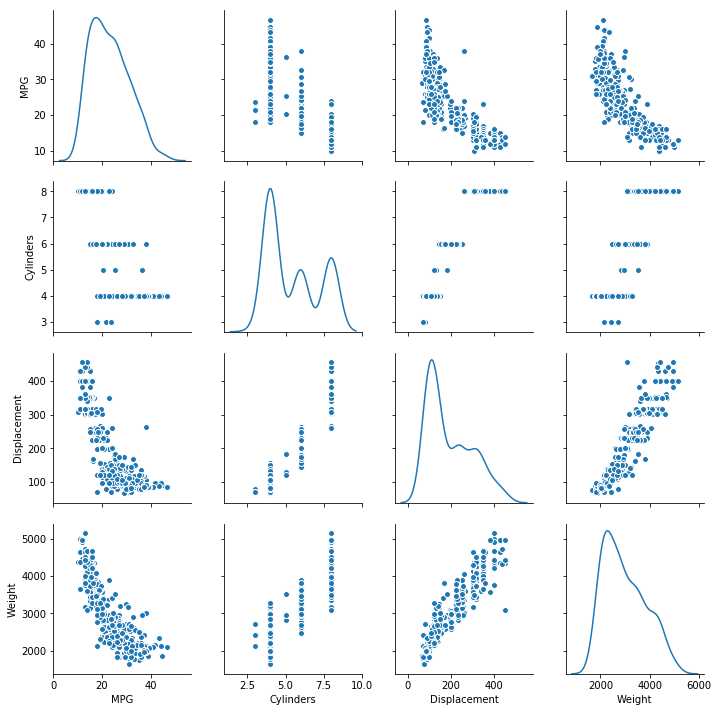

In [19]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [22]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [26]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [27]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [28]:
def build_model():
    
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [30]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [31]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.48957694],
       [-0.30943966],
       [-0.24490061],
       [-0.68894064],
       [-0.60712206],
       [ 0.03799768],
       [-0.6359097 ],
       [-0.26344976],
       [ 0.02738225],
       [-0.54497373]], dtype=float32)

In [32]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print(' ')
        print('.', end='')

In [33]:
callbacks = [PrintDot(),
             keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss')]

In [34]:
EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1,
                    callbacks=callbacks)

Train on 251 samples, validate on 63 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
251/251 [==============================] - 0s 2ms/sample - loss: 599.9823 - mean_absolute_error: 23.2253 - mean_squared_error: 599.9822 - val_loss: 605.3252 - val_mean_absolute_error: 23.3433 - val_mean_squared_error: 605.3252
Epoch 2/1000
251/251 [==============================] - 0s 205us/sample - loss: 567.7005 - mean_absolute_error: 22.5512 - mean_squared_error: 567.7005 - val_loss: 568.5056 - val_mean_absolute_error: 22.5797 - val_mean_squared_error: 568.5056
Epoch 3/1000
251/251 [==============================] - 0s 193us/sample - loss: 532.7284 - mean_absolute_error: 21.8098 - mean_squared_error: 532.7284 - val_loss: 527.1636 - val_mean_absolute_error: 21.6797 - val_mean_squared_error: 527.1636
Epoch 4/1000
251/251 [==============================] - 0s 200us/sample - loss: 493.0826 - mean_absolute_error: 20.9245 - mean_squared_error: 493.0826 - val_loss: 476.6968 - val_mean_

251/251 [==============================] - 0s 264us/sample - loss: 9.8837 - mean_absolute_error: 2.2670 - mean_squared_error: 9.8837 - val_loss: 9.9576 - val_mean_absolute_error: 2.5066 - val_mean_squared_error: 9.9576
Epoch 34/1000
251/251 [==============================] - 0s 197us/sample - loss: 9.7406 - mean_absolute_error: 2.2429 - mean_squared_error: 9.7406 - val_loss: 9.8094 - val_mean_absolute_error: 2.4694 - val_mean_squared_error: 9.8094
Epoch 35/1000
251/251 [==============================] - 0s 178us/sample - loss: 9.5929 - mean_absolute_error: 2.2176 - mean_squared_error: 9.5929 - val_loss: 9.6294 - val_mean_absolute_error: 2.4639 - val_mean_squared_error: 9.6294
Epoch 36/1000
251/251 [==============================] - 0s 182us/sample - loss: 9.3936 - mean_absolute_error: 2.1893 - mean_squared_error: 9.3936 - val_loss: 9.4880 - val_mean_absolute_error: 2.4345 - val_mean_squared_error: 9.4880
Epoch 37/1000
251/251 [==============================] - 0s 153us/sample - loss: 9

251/251 [==============================] - 0s 67us/sample - loss: 7.2769 - mean_absolute_error: 1.9025 - mean_squared_error: 7.2769 - val_loss: 8.6615 - val_mean_absolute_error: 2.2579 - val_mean_squared_error: 8.6615
Epoch 69/1000
251/251 [==============================] - 0s 94us/sample - loss: 7.1588 - mean_absolute_error: 1.8777 - mean_squared_error: 7.1588 - val_loss: 8.5967 - val_mean_absolute_error: 2.2343 - val_mean_squared_error: 8.5967
Epoch 70/1000
251/251 [==============================] - 0s 66us/sample - loss: 7.1232 - mean_absolute_error: 1.8924 - mean_squared_error: 7.1232 - val_loss: 8.6514 - val_mean_absolute_error: 2.2272 - val_mean_squared_error: 8.6514
Epoch 71/1000
251/251 [==============================] - 0s 79us/sample - loss: 7.0836 - mean_absolute_error: 1.8830 - mean_squared_error: 7.0836 - val_loss: 8.6509 - val_mean_absolute_error: 2.2284 - val_mean_squared_error: 8.6509
Epoch 72/1000
251/251 [==============================] - 0s 79us/sample - loss: 7.0235

Epoch 103/1000
251/251 [==============================] - 0s 84us/sample - loss: 6.3077 - mean_absolute_error: 1.7688 - mean_squared_error: 6.3077 - val_loss: 8.5993 - val_mean_absolute_error: 2.1780 - val_mean_squared_error: 8.5993
Epoch 104/1000
251/251 [==============================] - 0s 86us/sample - loss: 6.3268 - mean_absolute_error: 1.7722 - mean_squared_error: 6.3268 - val_loss: 8.5945 - val_mean_absolute_error: 2.2018 - val_mean_squared_error: 8.5945
Epoch 105/1000
251/251 [==============================] - 0s 88us/sample - loss: 6.3006 - mean_absolute_error: 1.7729 - mean_squared_error: 6.3006 - val_loss: 8.5321 - val_mean_absolute_error: 2.1743 - val_mean_squared_error: 8.5321
Epoch 106/1000
251/251 [==============================] - 0s 86us/sample - loss: 6.2440 - mean_absolute_error: 1.7680 - mean_squared_error: 6.2440 - val_loss: 8.5795 - val_mean_absolute_error: 2.1916 - val_mean_squared_error: 8.5795
Epoch 107/1000
251/251 [==============================] - 0s 80us/sa

251/251 [==============================] - 0s 87us/sample - loss: 5.7952 - mean_absolute_error: 1.6821 - mean_squared_error: 5.7952 - val_loss: 8.4575 - val_mean_absolute_error: 2.1832 - val_mean_squared_error: 8.4575
Epoch 139/1000
251/251 [==============================] - 0s 95us/sample - loss: 5.8312 - mean_absolute_error: 1.6914 - mean_squared_error: 5.8312 - val_loss: 8.4610 - val_mean_absolute_error: 2.1722 - val_mean_squared_error: 8.4610
Epoch 140/1000
251/251 [==============================] - 0s 95us/sample - loss: 5.7697 - mean_absolute_error: 1.6763 - mean_squared_error: 5.7697 - val_loss: 8.4776 - val_mean_absolute_error: 2.1996 - val_mean_squared_error: 8.4776
Epoch 141/1000
251/251 [==============================] - 0s 84us/sample - loss: 5.7671 - mean_absolute_error: 1.6622 - mean_squared_error: 5.7671 - val_loss: 8.4563 - val_mean_absolute_error: 2.1986 - val_mean_squared_error: 8.4563
Epoch 142/1000
251/251 [==============================] - 0s 81us/sample - loss: 5.

251/251 [==============================] - 0s 79us/sample - loss: 5.4733 - mean_absolute_error: 1.6283 - mean_squared_error: 5.4733 - val_loss: 8.4036 - val_mean_absolute_error: 2.1679 - val_mean_squared_error: 8.4036
Epoch 174/1000
251/251 [==============================] - 0s 82us/sample - loss: 5.4800 - mean_absolute_error: 1.6151 - mean_squared_error: 5.4800 - val_loss: 8.3359 - val_mean_absolute_error: 2.1857 - val_mean_squared_error: 8.3359
Epoch 175/1000
251/251 [==============================] - 0s 67us/sample - loss: 5.4628 - mean_absolute_error: 1.6180 - mean_squared_error: 5.4628 - val_loss: 8.4407 - val_mean_absolute_error: 2.2039 - val_mean_squared_error: 8.4407
Epoch 176/1000
251/251 [==============================] - 0s 79us/sample - loss: 5.4486 - mean_absolute_error: 1.6167 - mean_squared_error: 5.4486 - val_loss: 8.4051 - val_mean_absolute_error: 2.1880 - val_mean_squared_error: 8.4051
Epoch 177/1000
251/251 [==============================] - 0s 83us/sample - loss: 5.

Epoch 208/1000
251/251 [==============================] - 0s 83us/sample - loss: 5.2323 - mean_absolute_error: 1.5790 - mean_squared_error: 5.2323 - val_loss: 8.2801 - val_mean_absolute_error: 2.1719 - val_mean_squared_error: 8.2801
Epoch 209/1000
251/251 [==============================] - 0s 91us/sample - loss: 5.2705 - mean_absolute_error: 1.5722 - mean_squared_error: 5.2705 - val_loss: 8.2651 - val_mean_absolute_error: 2.2153 - val_mean_squared_error: 8.2651
Epoch 210/1000
251/251 [==============================] - 0s 80us/sample - loss: 5.2040 - mean_absolute_error: 1.5584 - mean_squared_error: 5.2040 - val_loss: 8.2657 - val_mean_absolute_error: 2.1837 - val_mean_squared_error: 8.2657
Epoch 211/1000
251/251 [==============================] - 0s 88us/sample - loss: 5.2271 - mean_absolute_error: 1.5846 - mean_squared_error: 5.2271 - val_loss: 8.2840 - val_mean_absolute_error: 2.1491 - val_mean_squared_error: 8.2840
Epoch 212/1000
251/251 [==============================] - 0s 129us/s

251/251 [==============================] - 0s 108us/sample - loss: 5.0558 - mean_absolute_error: 1.5520 - mean_squared_error: 5.0558 - val_loss: 8.2253 - val_mean_absolute_error: 2.1760 - val_mean_squared_error: 8.2253
Epoch 244/1000
251/251 [==============================] - 0s 123us/sample - loss: 5.0368 - mean_absolute_error: 1.5417 - mean_squared_error: 5.0368 - val_loss: 8.2238 - val_mean_absolute_error: 2.1943 - val_mean_squared_error: 8.2238
Epoch 245/1000
251/251 [==============================] - 0s 200us/sample - loss: 5.0548 - mean_absolute_error: 1.5351 - mean_squared_error: 5.0548 - val_loss: 8.1308 - val_mean_absolute_error: 2.1865 - val_mean_squared_error: 8.1308
Epoch 246/1000
251/251 [==============================] - 0s 92us/sample - loss: 5.0513 - mean_absolute_error: 1.5197 - mean_squared_error: 5.0513 - val_loss: 8.1726 - val_mean_absolute_error: 2.1859 - val_mean_squared_error: 8.1726
Epoch 247/1000
251/251 [==============================] - 0s 88us/sample - loss:

251/251 [==============================] - 0s 134us/sample - loss: 4.9392 - mean_absolute_error: 1.5011 - mean_squared_error: 4.9392 - val_loss: 8.1155 - val_mean_absolute_error: 2.1911 - val_mean_squared_error: 8.1155
Epoch 279/1000
251/251 [==============================] - 0s 228us/sample - loss: 5.0054 - mean_absolute_error: 1.5305 - mean_squared_error: 5.0054 - val_loss: 8.0703 - val_mean_absolute_error: 2.1431 - val_mean_squared_error: 8.0703
Epoch 280/1000
251/251 [==============================] - 0s 94us/sample - loss: 4.8547 - mean_absolute_error: 1.5030 - mean_squared_error: 4.8547 - val_loss: 8.1552 - val_mean_absolute_error: 2.2007 - val_mean_squared_error: 8.1552
Epoch 281/1000
251/251 [==============================] - 0s 89us/sample - loss: 4.9785 - mean_absolute_error: 1.5107 - mean_squared_error: 4.9785 - val_loss: 8.1485 - val_mean_absolute_error: 2.1974 - val_mean_squared_error: 8.1485
Epoch 282/1000
251/251 [==============================] - 0s 110us/sample - loss:

Epoch 313/1000
251/251 [==============================] - 0s 99us/sample - loss: 4.7103 - mean_absolute_error: 1.4699 - mean_squared_error: 4.7103 - val_loss: 8.2215 - val_mean_absolute_error: 2.2104 - val_mean_squared_error: 8.2215
Epoch 314/1000
251/251 [==============================] - 0s 94us/sample - loss: 4.7667 - mean_absolute_error: 1.4667 - mean_squared_error: 4.7667 - val_loss: 8.2932 - val_mean_absolute_error: 2.2127 - val_mean_squared_error: 8.2932
Epoch 315/1000
251/251 [==============================] - 0s 84us/sample - loss: 4.7065 - mean_absolute_error: 1.4772 - mean_squared_error: 4.7065 - val_loss: 8.1554 - val_mean_absolute_error: 2.1497 - val_mean_squared_error: 8.1554
Epoch 316/1000
251/251 [==============================] - 0s 111us/sample - loss: 4.7542 - mean_absolute_error: 1.4859 - mean_squared_error: 4.7542 - val_loss: 8.0384 - val_mean_absolute_error: 2.1814 - val_mean_squared_error: 8.0384
Epoch 317/1000
251/251 [==============================] - 0s 77us/s

251/251 [==============================] - 0s 106us/sample - loss: 4.5907 - mean_absolute_error: 1.4484 - mean_squared_error: 4.5907 - val_loss: 8.0410 - val_mean_absolute_error: 2.1639 - val_mean_squared_error: 8.0410
Epoch 349/1000
251/251 [==============================] - 0s 99us/sample - loss: 4.6276 - mean_absolute_error: 1.4645 - mean_squared_error: 4.6276 - val_loss: 8.2968 - val_mean_absolute_error: 2.2256 - val_mean_squared_error: 8.2968
Epoch 350/1000
251/251 [==============================] - 0s 107us/sample - loss: 4.6167 - mean_absolute_error: 1.4488 - mean_squared_error: 4.6167 - val_loss: 8.2257 - val_mean_absolute_error: 2.1944 - val_mean_squared_error: 8.2257
Epoch 351/1000
251/251 [==============================] - 0s 85us/sample - loss: 4.6086 - mean_absolute_error: 1.4399 - mean_squared_error: 4.6086 - val_loss: 8.0889 - val_mean_absolute_error: 2.1968 - val_mean_squared_error: 8.0889
Epoch 352/1000
251/251 [==============================] - 0s 97us/sample - loss: 

251/251 [==============================] - 0s 104us/sample - loss: 4.6093 - mean_absolute_error: 1.4485 - mean_squared_error: 4.6093 - val_loss: 8.1640 - val_mean_absolute_error: 2.1363 - val_mean_squared_error: 8.1640
Epoch 384/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.4892 - mean_absolute_error: 1.4290 - mean_squared_error: 4.4892 - val_loss: 8.2334 - val_mean_absolute_error: 2.2309 - val_mean_squared_error: 8.2334
Epoch 385/1000
251/251 [==============================] - 0s 99us/sample - loss: 4.5206 - mean_absolute_error: 1.4151 - mean_squared_error: 4.5206 - val_loss: 8.1273 - val_mean_absolute_error: 2.1807 - val_mean_squared_error: 8.1273
Epoch 386/1000
251/251 [==============================] - 0s 90us/sample - loss: 4.4526 - mean_absolute_error: 1.4152 - mean_squared_error: 4.4526 - val_loss: 8.2654 - val_mean_absolute_error: 2.2282 - val_mean_squared_error: 8.2654
Epoch 387/1000
251/251 [==============================] - 0s 78us/sample - loss: 4

Epoch 418/1000
251/251 [==============================] - 0s 93us/sample - loss: 4.2909 - mean_absolute_error: 1.4132 - mean_squared_error: 4.2909 - val_loss: 8.0780 - val_mean_absolute_error: 2.1762 - val_mean_squared_error: 8.0780
Epoch 419/1000
251/251 [==============================] - 0s 82us/sample - loss: 4.2280 - mean_absolute_error: 1.3860 - mean_squared_error: 4.2280 - val_loss: 8.1630 - val_mean_absolute_error: 2.2006 - val_mean_squared_error: 8.1630
Epoch 420/1000
251/251 [==============================] - 0s 78us/sample - loss: 4.2689 - mean_absolute_error: 1.3976 - mean_squared_error: 4.2689 - val_loss: 8.1762 - val_mean_absolute_error: 2.2043 - val_mean_squared_error: 8.1762
Epoch 421/1000
251/251 [==============================] - 0s 107us/sample - loss: 4.2843 - mean_absolute_error: 1.3904 - mean_squared_error: 4.2843 - val_loss: 8.2572 - val_mean_absolute_error: 2.2194 - val_mean_squared_error: 8.2572
Epoch 422/1000
251/251 [==============================] - 0s 99us/s

251/251 [==============================] - 0s 92us/sample - loss: 4.1223 - mean_absolute_error: 1.3702 - mean_squared_error: 4.1223 - val_loss: 8.1368 - val_mean_absolute_error: 2.1957 - val_mean_squared_error: 8.1368
Epoch 454/1000
251/251 [==============================] - 0s 104us/sample - loss: 4.1946 - mean_absolute_error: 1.3656 - mean_squared_error: 4.1946 - val_loss: 8.3159 - val_mean_absolute_error: 2.2260 - val_mean_squared_error: 8.3159
Epoch 455/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.0927 - mean_absolute_error: 1.3473 - mean_squared_error: 4.0927 - val_loss: 8.2747 - val_mean_absolute_error: 2.1773 - val_mean_squared_error: 8.2747
Epoch 456/1000
251/251 [==============================] - 0s 70us/sample - loss: 4.1052 - mean_absolute_error: 1.3503 - mean_squared_error: 4.1052 - val_loss: 8.1673 - val_mean_absolute_error: 2.1952 - val_mean_squared_error: 8.1673
Epoch 457/1000
251/251 [==============================] - 0s 76us/sample - loss: 4

251/251 [==============================] - 0s 81us/sample - loss: 3.9703 - mean_absolute_error: 1.3292 - mean_squared_error: 3.9703 - val_loss: 8.2962 - val_mean_absolute_error: 2.2145 - val_mean_squared_error: 8.2962
Epoch 489/1000
251/251 [==============================] - 0s 108us/sample - loss: 4.0749 - mean_absolute_error: 1.3468 - mean_squared_error: 4.0749 - val_loss: 8.1276 - val_mean_absolute_error: 2.1826 - val_mean_squared_error: 8.1276
Epoch 490/1000
251/251 [==============================] - 0s 79us/sample - loss: 4.0059 - mean_absolute_error: 1.3239 - mean_squared_error: 4.0059 - val_loss: 8.1462 - val_mean_absolute_error: 2.2014 - val_mean_squared_error: 8.1462
Epoch 491/1000
251/251 [==============================] - 0s 73us/sample - loss: 3.9831 - mean_absolute_error: 1.3175 - mean_squared_error: 3.9831 - val_loss: 8.1938 - val_mean_absolute_error: 2.2014 - val_mean_squared_error: 8.1938
Epoch 492/1000
251/251 [==============================] - 0s 81us/sample - loss: 4

Epoch 523/1000
251/251 [==============================] - 0s 83us/sample - loss: 3.7895 - mean_absolute_error: 1.3033 - mean_squared_error: 3.7895 - val_loss: 8.3736 - val_mean_absolute_error: 2.2066 - val_mean_squared_error: 8.3736
Epoch 524/1000
251/251 [==============================] - 0s 85us/sample - loss: 3.8257 - mean_absolute_error: 1.3037 - mean_squared_error: 3.8257 - val_loss: 8.3376 - val_mean_absolute_error: 2.2141 - val_mean_squared_error: 8.3376
Epoch 525/1000
251/251 [==============================] - 0s 78us/sample - loss: 3.8196 - mean_absolute_error: 1.2913 - mean_squared_error: 3.8196 - val_loss: 8.3418 - val_mean_absolute_error: 2.2060 - val_mean_squared_error: 8.3418
Epoch 526/1000
251/251 [==============================] - 0s 79us/sample - loss: 3.8268 - mean_absolute_error: 1.2828 - mean_squared_error: 3.8268 - val_loss: 8.2479 - val_mean_absolute_error: 2.2051 - val_mean_squared_error: 8.2479
Epoch 527/1000
251/251 [==============================] - 0s 77us/sa

251/251 [==============================] - 0s 78us/sample - loss: 3.7129 - mean_absolute_error: 1.2638 - mean_squared_error: 3.7129 - val_loss: 8.3222 - val_mean_absolute_error: 2.2141 - val_mean_squared_error: 8.3222
Epoch 559/1000
251/251 [==============================] - 0s 81us/sample - loss: 3.6259 - mean_absolute_error: 1.2541 - mean_squared_error: 3.6259 - val_loss: 8.3055 - val_mean_absolute_error: 2.2157 - val_mean_squared_error: 8.3055
Epoch 560/1000
251/251 [==============================] - 0s 95us/sample - loss: 3.6145 - mean_absolute_error: 1.2459 - mean_squared_error: 3.6145 - val_loss: 8.4533 - val_mean_absolute_error: 2.2097 - val_mean_squared_error: 8.4533
Epoch 561/1000
251/251 [==============================] - 0s 84us/sample - loss: 3.6660 - mean_absolute_error: 1.2516 - mean_squared_error: 3.6660 - val_loss: 8.4567 - val_mean_absolute_error: 2.2361 - val_mean_squared_error: 8.4567
Epoch 562/1000
251/251 [==============================] - 0s 89us/sample - loss: 3.

251/251 [==============================] - 0s 95us/sample - loss: 3.4400 - mean_absolute_error: 1.2063 - mean_squared_error: 3.4400 - val_loss: 8.4963 - val_mean_absolute_error: 2.2435 - val_mean_squared_error: 8.4963
Epoch 594/1000
251/251 [==============================] - 0s 102us/sample - loss: 3.4086 - mean_absolute_error: 1.2087 - mean_squared_error: 3.4086 - val_loss: 8.4980 - val_mean_absolute_error: 2.2159 - val_mean_squared_error: 8.4980
Epoch 595/1000
251/251 [==============================] - 0s 114us/sample - loss: 3.4895 - mean_absolute_error: 1.2219 - mean_squared_error: 3.4895 - val_loss: 8.4082 - val_mean_absolute_error: 2.2114 - val_mean_squared_error: 8.4082
Epoch 596/1000
251/251 [==============================] - 0s 82us/sample - loss: 3.4503 - mean_absolute_error: 1.2125 - mean_squared_error: 3.4503 - val_loss: 8.3647 - val_mean_absolute_error: 2.2084 - val_mean_squared_error: 8.3647
Epoch 597/1000
251/251 [==============================] - 0s 86us/sample - loss: 

Epoch 628/1000
251/251 [==============================] - 0s 87us/sample - loss: 3.3305 - mean_absolute_error: 1.1922 - mean_squared_error: 3.3305 - val_loss: 8.6408 - val_mean_absolute_error: 2.2412 - val_mean_squared_error: 8.6408
Epoch 629/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.3303 - mean_absolute_error: 1.1962 - mean_squared_error: 3.3303 - val_loss: 8.1714 - val_mean_absolute_error: 2.1918 - val_mean_squared_error: 8.1714
Epoch 630/1000
251/251 [==============================] - 0s 99us/sample - loss: 3.3233 - mean_absolute_error: 1.1795 - mean_squared_error: 3.3233 - val_loss: 8.4037 - val_mean_absolute_error: 2.2343 - val_mean_squared_error: 8.4037
Epoch 631/1000
251/251 [==============================] - 0s 81us/sample - loss: 3.3421 - mean_absolute_error: 1.1873 - mean_squared_error: 3.3421 - val_loss: 8.3854 - val_mean_absolute_error: 2.1959 - val_mean_squared_error: 8.3854
Epoch 632/1000
251/251 [==============================] - 0s 98us/s

251/251 [==============================] - 0s 95us/sample - loss: 3.3806 - mean_absolute_error: 1.1633 - mean_squared_error: 3.3806 - val_loss: 8.3137 - val_mean_absolute_error: 2.2139 - val_mean_squared_error: 8.3137
Epoch 664/1000
251/251 [==============================] - 0s 110us/sample - loss: 3.2745 - mean_absolute_error: 1.1792 - mean_squared_error: 3.2745 - val_loss: 8.3286 - val_mean_absolute_error: 2.2131 - val_mean_squared_error: 8.3286
Epoch 665/1000
251/251 [==============================] - 0s 94us/sample - loss: 3.1496 - mean_absolute_error: 1.1652 - mean_squared_error: 3.1496 - val_loss: 8.6579 - val_mean_absolute_error: 2.2390 - val_mean_squared_error: 8.6579
Epoch 666/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.2075 - mean_absolute_error: 1.1556 - mean_squared_error: 3.2075 - val_loss: 8.1905 - val_mean_absolute_error: 2.1968 - val_mean_squared_error: 8.1905
Epoch 667/1000
251/251 [==============================] - 0s 100us/sample - loss: 

251/251 [==============================] - 0s 85us/sample - loss: 3.0509 - mean_absolute_error: 1.1141 - mean_squared_error: 3.0509 - val_loss: 8.5108 - val_mean_absolute_error: 2.2308 - val_mean_squared_error: 8.5108
Epoch 699/1000
251/251 [==============================] - 0s 130us/sample - loss: 3.0270 - mean_absolute_error: 1.1002 - mean_squared_error: 3.0270 - val_loss: 8.3988 - val_mean_absolute_error: 2.2279 - val_mean_squared_error: 8.3988
Epoch 700/1000
251/251 [==============================] - 0s 79us/sample - loss: 3.0507 - mean_absolute_error: 1.1175 - mean_squared_error: 3.0507 - val_loss: 8.5397 - val_mean_absolute_error: 2.2344 - val_mean_squared_error: 8.5397
Epoch 701/1000
251/251 [==============================] - 0s 93us/sample - loss: 3.0231 - mean_absolute_error: 1.1164 - mean_squared_error: 3.0231 - val_loss: 8.3552 - val_mean_absolute_error: 2.2252 - val_mean_squared_error: 8.3552
Epoch 702/1000
251/251 [==============================] - 0s 77us/sample - loss: 3

Epoch 733/1000
251/251 [==============================] - 0s 97us/sample - loss: 2.9331 - mean_absolute_error: 1.0747 - mean_squared_error: 2.9331 - val_loss: 8.3777 - val_mean_absolute_error: 2.2177 - val_mean_squared_error: 8.3777
Epoch 734/1000
251/251 [==============================] - 0s 95us/sample - loss: 2.8975 - mean_absolute_error: 1.0814 - mean_squared_error: 2.8975 - val_loss: 8.3732 - val_mean_absolute_error: 2.2199 - val_mean_squared_error: 8.3732
Epoch 735/1000
251/251 [==============================] - 0s 78us/sample - loss: 2.9606 - mean_absolute_error: 1.0892 - mean_squared_error: 2.9606 - val_loss: 8.5941 - val_mean_absolute_error: 2.2386 - val_mean_squared_error: 8.5941
Epoch 736/1000
251/251 [==============================] - 0s 84us/sample - loss: 2.9932 - mean_absolute_error: 1.0928 - mean_squared_error: 2.9932 - val_loss: 8.5277 - val_mean_absolute_error: 2.2348 - val_mean_squared_error: 8.5277
Epoch 737/1000
251/251 [==============================] - 0s 80us/sa

251/251 [==============================] - 0s 85us/sample - loss: 2.8459 - mean_absolute_error: 1.0709 - mean_squared_error: 2.8459 - val_loss: 8.5852 - val_mean_absolute_error: 2.2434 - val_mean_squared_error: 8.5852
Epoch 769/1000
251/251 [==============================] - 0s 104us/sample - loss: 2.8220 - mean_absolute_error: 1.0533 - mean_squared_error: 2.8220 - val_loss: 8.2668 - val_mean_absolute_error: 2.2052 - val_mean_squared_error: 8.2668
Epoch 770/1000
251/251 [==============================] - 0s 88us/sample - loss: 2.9282 - mean_absolute_error: 1.1144 - mean_squared_error: 2.9282 - val_loss: 8.6407 - val_mean_absolute_error: 2.2450 - val_mean_squared_error: 8.6407
Epoch 771/1000
251/251 [==============================] - 0s 76us/sample - loss: 2.8495 - mean_absolute_error: 1.0668 - mean_squared_error: 2.8495 - val_loss: 8.6365 - val_mean_absolute_error: 2.2518 - val_mean_squared_error: 8.6365
Epoch 772/1000
251/251 [==============================] - 0s 68us/sample - loss: 2

Epoch 803/1000
251/251 [==============================] - 0s 104us/sample - loss: 2.6888 - mean_absolute_error: 1.0240 - mean_squared_error: 2.6888 - val_loss: 8.3709 - val_mean_absolute_error: 2.2061 - val_mean_squared_error: 8.3709
Epoch 804/1000
251/251 [==============================] - 0s 100us/sample - loss: 2.7359 - mean_absolute_error: 1.0285 - mean_squared_error: 2.7359 - val_loss: 8.0897 - val_mean_absolute_error: 2.1821 - val_mean_squared_error: 8.0897
Epoch 805/1000
251/251 [==============================] - 0s 90us/sample - loss: 2.7487 - mean_absolute_error: 1.0545 - mean_squared_error: 2.7487 - val_loss: 8.3721 - val_mean_absolute_error: 2.1983 - val_mean_squared_error: 8.3721
Epoch 806/1000
251/251 [==============================] - 0s 96us/sample - loss: 2.8008 - mean_absolute_error: 1.0535 - mean_squared_error: 2.8008 - val_loss: 8.4441 - val_mean_absolute_error: 2.2190 - val_mean_squared_error: 8.4441
Epoch 807/1000
251/251 [==============================] - 0s 80us/

251/251 [==============================] - 0s 74us/sample - loss: 2.6005 - mean_absolute_error: 0.9829 - mean_squared_error: 2.6005 - val_loss: 8.6142 - val_mean_absolute_error: 2.2360 - val_mean_squared_error: 8.6142
Epoch 839/1000
251/251 [==============================] - 0s 87us/sample - loss: 2.5816 - mean_absolute_error: 0.9885 - mean_squared_error: 2.5816 - val_loss: 8.1989 - val_mean_absolute_error: 2.2030 - val_mean_squared_error: 8.1989
Epoch 840/1000
251/251 [==============================] - 0s 78us/sample - loss: 2.6379 - mean_absolute_error: 0.9954 - mean_squared_error: 2.6379 - val_loss: 8.2975 - val_mean_absolute_error: 2.1997 - val_mean_squared_error: 8.2975
Epoch 841/1000
251/251 [==============================] - 0s 79us/sample - loss: 2.6049 - mean_absolute_error: 0.9999 - mean_squared_error: 2.6049 - val_loss: 8.3330 - val_mean_absolute_error: 2.2031 - val_mean_squared_error: 8.3330
Epoch 842/1000
251/251 [==============================] - 0s 92us/sample - loss: 2.

251/251 [==============================] - 0s 79us/sample - loss: 2.6154 - mean_absolute_error: 0.9916 - mean_squared_error: 2.6154 - val_loss: 8.0882 - val_mean_absolute_error: 2.1738 - val_mean_squared_error: 8.0882
Epoch 874/1000
251/251 [==============================] - 0s 97us/sample - loss: 2.6021 - mean_absolute_error: 1.0323 - mean_squared_error: 2.6021 - val_loss: 8.4739 - val_mean_absolute_error: 2.2302 - val_mean_squared_error: 8.4739
Epoch 875/1000
251/251 [==============================] - 0s 83us/sample - loss: 2.5495 - mean_absolute_error: 1.0003 - mean_squared_error: 2.5495 - val_loss: 8.1979 - val_mean_absolute_error: 2.1885 - val_mean_squared_error: 8.1979
Epoch 876/1000
251/251 [==============================] - 0s 65us/sample - loss: 2.5296 - mean_absolute_error: 0.9807 - mean_squared_error: 2.5296 - val_loss: 7.9766 - val_mean_absolute_error: 2.1604 - val_mean_squared_error: 7.9766
Epoch 877/1000
251/251 [==============================] - 0s 75us/sample - loss: 2.

Epoch 908/1000
251/251 [==============================] - 0s 83us/sample - loss: 2.5234 - mean_absolute_error: 1.0132 - mean_squared_error: 2.5234 - val_loss: 8.4829 - val_mean_absolute_error: 2.1986 - val_mean_squared_error: 8.4829
Epoch 909/1000
251/251 [==============================] - 0s 85us/sample - loss: 2.4351 - mean_absolute_error: 0.9578 - mean_squared_error: 2.4351 - val_loss: 8.4693 - val_mean_absolute_error: 2.2189 - val_mean_squared_error: 8.4692
Epoch 910/1000
251/251 [==============================] - 0s 97us/sample - loss: 2.4287 - mean_absolute_error: 0.9546 - mean_squared_error: 2.4287 - val_loss: 8.1726 - val_mean_absolute_error: 2.2187 - val_mean_squared_error: 8.1726
Epoch 911/1000
251/251 [==============================] - 0s 75us/sample - loss: 2.4753 - mean_absolute_error: 0.9923 - mean_squared_error: 2.4753 - val_loss: 8.5361 - val_mean_absolute_error: 2.2198 - val_mean_squared_error: 8.5361
Epoch 912/1000
251/251 [==============================] - 0s 93us/sa

251/251 [==============================] - 0s 92us/sample - loss: 2.2902 - mean_absolute_error: 0.9076 - mean_squared_error: 2.2902 - val_loss: 8.2955 - val_mean_absolute_error: 2.2037 - val_mean_squared_error: 8.2955
Epoch 944/1000
251/251 [==============================] - 0s 81us/sample - loss: 2.3523 - mean_absolute_error: 0.9238 - mean_squared_error: 2.3523 - val_loss: 8.0691 - val_mean_absolute_error: 2.1655 - val_mean_squared_error: 8.0691
Epoch 945/1000
251/251 [==============================] - 0s 79us/sample - loss: 2.3846 - mean_absolute_error: 0.9609 - mean_squared_error: 2.3846 - val_loss: 8.5369 - val_mean_absolute_error: 2.2254 - val_mean_squared_error: 8.5369
Epoch 946/1000
251/251 [==============================] - 0s 75us/sample - loss: 2.3129 - mean_absolute_error: 0.9117 - mean_squared_error: 2.3129 - val_loss: 8.2461 - val_mean_absolute_error: 2.1652 - val_mean_squared_error: 8.2461
Epoch 947/1000
251/251 [==============================] - 0s 82us/sample - loss: 2.

251/251 [==============================] - 0s 89us/sample - loss: 2.2639 - mean_absolute_error: 0.9262 - mean_squared_error: 2.2639 - val_loss: 8.1985 - val_mean_absolute_error: 2.1687 - val_mean_squared_error: 8.1985
Epoch 979/1000
251/251 [==============================] - 0s 95us/sample - loss: 2.3121 - mean_absolute_error: 0.9025 - mean_squared_error: 2.3121 - val_loss: 8.1935 - val_mean_absolute_error: 2.1682 - val_mean_squared_error: 8.1935
Epoch 980/1000
251/251 [==============================] - 0s 79us/sample - loss: 2.2804 - mean_absolute_error: 0.9277 - mean_squared_error: 2.2804 - val_loss: 8.3576 - val_mean_absolute_error: 2.2017 - val_mean_squared_error: 8.3576
Epoch 981/1000
251/251 [==============================] - 0s 83us/sample - loss: 2.2978 - mean_absolute_error: 0.9173 - mean_squared_error: 2.2978 - val_loss: 8.2786 - val_mean_absolute_error: 2.1668 - val_mean_squared_error: 8.2786
Epoch 982/1000
251/251 [==============================] - 0s 81us/sample - loss: 2.

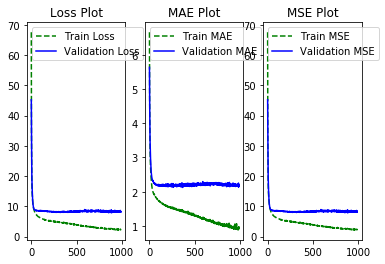

In [36]:
plt.figure()

plt.subplot(131)
plt.plot( range(EPOCHS-10), history.history['loss'][10:], 'g--', label='Train Loss' )
plt.plot( range(EPOCHS-10), history.history['val_loss'][10:], 'b', label='Validation Loss' )
plt.title('Loss Plot')
plt.legend()

plt.subplot(132)
plt.plot( range(EPOCHS-10), history.history['mean_absolute_error'][10:], 'g--', label='Train MAE' )
plt.plot( range(EPOCHS-10), history.history['val_mean_absolute_error'][10:], 'b', label='Validation MAE' )
plt.title('MAE Plot')
plt.legend()

plt.subplot(133)
plt.plot( range(EPOCHS-10), history.history['mean_squared_error'][10:], 'g--', label='Train MSE' )
plt.plot( range(EPOCHS-10), history.history['val_mean_squared_error'][10:], 'b', label='Validation MSE' )
plt.title('MSE Plot')
plt.legend()

plt.show()

In [37]:
model.evaluate(normed_test_data, test_labels)

78/78 [==============================] - 0s 66us/sample - loss: 6.2463 - mean_absolute_error: 1.9550 - mean_squared_error: 6.2463


[6.246331948500413, 1.9549689, 6.246332]

In [38]:
help( plt.axis )

Help on function axis in module matplotlib.pyplot:

axis(*v, **kwargs)
    Convenience method to get or set some axis properties.
    
    Call signatures::
    
      xmin, xmax, ymin, ymax = axis()
      xmin, xmax, ymin, ymax = axis(xmin, xmax, ymin, ymax)
      xmin, xmax, ymin, ymax = axis(option)
      xmin, xmax, ymin, ymax = axis(**kwargs)
    
    Parameters
    ----------
    xmin, ymin, xmax, ymax : float, optional
        The axis limits to be set. Either none or all of the limits must
        be given.
    
    option : str
        Possible values:
    
        ======== ==========================================================
        Value    Description
        ======== ==========================================================
        'on'     Turn on axis lines and labels.
        'off'    Turn off axis lines and labels.
        'equal'  Set equal scaling (i.e., make circles circular) by
                 changing axis limits.
        'scaled' Set equal scaling (i.e., 

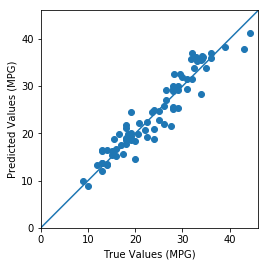

In [40]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (MPG)')
plt.ylabel('Predicted Values (MPG)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100,  100])

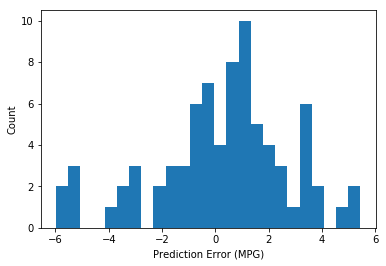

In [41]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error (MPG)')
_ = plt.ylabel('Count')